<h2><center> Unicorn Companies Exploratory Data Analysis </center></h2>


![Alt text](Unicorn-startup.JPEG)

    In this notebook, we will be looking into a unicorn companies and perform the entire exploratory Data Analysis(EDA) process:-- from data collection to interpretation, using Python and various data analysis libraries.The goal of this EDA project is to gain insights into the company's performance, growth, and market positioning, as well as to identify any trends or patterns in the data that may be useful for future analyses. Through my analysis, I will try to uncover interesting findings that I believe will be valuable to understand about these companies and how their performance.

    In this notebook, you will find detailed explanations of the data cleaning and preprocessing steps, the visualizations used to explore the data, and the statistical analyses performed to validate my observations. I have also included notes on my thought process and decision-making throughout the analysis, so that anyone who views this notebook can follow along with the reasoning behind each step.

    My hope is that this notebook will not only provide valuable insights into the company I have analyzed but also serve as a resource for anyone looking to conduct a similar analysis in the future. Feel free to explore the notebook and reach out to me with any questions or feedback. Thank you for your time, and I hope you find this notebook informative and helpful.


Data source credit: https://tinyurl.com/UnicornData

### Step 1: Importing dependencies and libraries and Loading dataset

In [234]:
# Importing libraries and modules required for the data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 

In [235]:
#Loading the dataset

df_unicorn = pd.read_csv("Unicorn_Companies.csv")

### Step 2: Data exploration



In [236]:
# Display the first 5 rows of the data.

df_unicorn.head().style.background_gradient()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [237]:
#Variables(columns in the dataset)

df_unicorn.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors'],
      dtype='object')

### Statistical properties of the dataset

Use `pandas` library to get a better sense of the data, including range, data types, mean values, and shape. 



In [238]:
#What is the shape of the dataset?

df_unicorn.shape

(1074, 10)

In [239]:
df_unicorn.describe

<bound method NDFrame.describe of           Company Valuation Date Joined                         Industry  \
0       Bytedance     $180B      4/7/17          Artificial intelligence   
1          SpaceX     $100B     12/1/12                            Other   
2           SHEIN     $100B      7/3/18  E-commerce & direct-to-consumer   
3          Stripe      $95B     1/23/14                          Fintech   
4          Klarna      $46B    12/12/11                          Fintech   
...           ...       ...         ...                              ...   
1069     Zhaogang       $1B     6/29/17  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan       $1B     4/18/17  E-commerce & direct-to-consumer   
1071     Zihaiguo       $1B      5/6/21                Consumer & retail   
1072         Zopa       $1B    10/19/21                          Fintech   
1073        Zwift       $1B     9/16/20  E-commerce & direct-to-consumer   

               City  Country/Region      Continent  Y

In [240]:
# Get the data types and number of non-null values in the dataset.

df_unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**What are the data types of various columns?**
- Except for the `Year Funded` column, which is `int64`, the data type for all other columns is `object`. As shown above. 

**How many columns contain non-null values less than the total rows in the dataset?**
- Columns `City` and `Select Investors` contain fewer non-null values than the total number of rows in the dataset.     Which mean the two columns contain missing values. We will investigate that in the following section.

In [241]:
# Get the general statistical value of different values in the dataset.

df_unicorn.describe().style.background_gradient()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**In what year was the oldest company founded?**
-  The oldest company in the list was founded in 1919. This is the minimum statistical summary value shown in `Year Founded, shown above. 

In [242]:
#Check missing values
df_unicorn.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [243]:
#Check for duplicate rows

df_unicorn.duplicated().sum()

0

In [244]:
#incorrect data replacement
df_unicorn.replace({'Industry': r'Artificial intelligence'}, {'Industry':'Artificial Intelligence'},regex=True, inplace=True)

* There are no duplicate values in the dataset 


**How many missing values are in each column in the dataset?**
- There is a single missing value in the `Select Investors` column and 16 missing cities. There are no missing values in other columns. 


**Which column has the most data missing?**
- The City column has the most data missing.

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_unicorn`. 

* Filter the DataFrame to only include rows with at least one missing value.
* Assign the filtered results to a variable named "df_rows_missing" and display the contents of the variable.

In [245]:

df_rows_missing=df_unicorn[df_unicorn.isna().any(axis=1)]

df_rows_missing

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,7/22/19,Artificial Intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,9/23/21,Artificial Intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


**It's also important to keep in mind that, sometimes, there may be other types of values in the dataset that are considered missing, such as empty strings and `-1`, `0`, `NaN`, and `NA`. Using one representation for all these missing values is beneficial. 
Let's replace any missing values in the dataset with `np.nan`, to simplify the missing values imputation process**


Without replacing the original DataFrame, let's replace 'Asia' with `np.nan`. Then, find the number of missing values in the dataset.

In [246]:
# Find the number of missing values after replacing 'Asia' with `np.nan`.

df_unicorn.replace('Asia', np.nan).isna().sum()

Company               0
Valuation             0
Date Joined           0
Industry              0
City                 16
Country/Region        0
Continent           310
Year Founded          0
Funding               0
Select Investors      1
dtype: int64

**Question: How many values went missing after changing 'Asia' with `np.nan`?**
- 310 rows now contain missing values.

**Question: What observations can be made about the forms and context of missing data?**
- Missing values can take different forms and are usually context-specific. Not every missing value is labeled as `na` or `None`, or `Null`.

In [247]:
df_unicorn.size

10740

## Step 3: Data pre-processing and Model building

****Addressing the missing values in the dataset.****

* There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and missing values imputation. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

* In order to compare the the two primary method mentioned above, let's create another dataset without the missing values and compare the out come of our investigation. 



In [248]:
# Store the total number of values in a variable.


count_total = df_unicorn.size

* Now, let's remove the missing values and count the total number of values in the dataset. Remove all rows containing missing values and store the total number of cells in a variable called `count_dropna_rows`. 

* And also, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.



In [249]:
# Drop the rows containing missing values.

count_dropna_rows = df_unicorn.dropna().size

In [250]:
# Drop the columns containing missing values.


count_dropna_columns = df_unicorn.dropna(axis=1).size

* Now, let's compare the percentage of removed values from the two method above. 




In [251]:
# Print the percentage of values removed by dropping rows.

print(f"\033[1mPercentage of values removed by dropping rows:\033[0m {round(count_dropna_rows/count_total*100)}%\n")

# Print the percentage of values removed by dropping columns.


print(f"\033[1mPercentage of values removed by dropping columns:\033[0m {count_dropna_columns/count_total*100}%")

Percentage of values removed by dropping rows: 98%

Percentage of values removed by dropping columns: 80.0%


**Question: Which method was most effective? and Why?**

* The percentage removed was significantly higher for columns than it was for rows. So, with this dataset, the columns method was more effective at removing more values. 

**Let's try the second method: imputation. Begin by filling missing values using the backfill method. Then, show the rows that previously had missing values.**

In [252]:
# Fill missing values using 'backfill' method.


df_unicorn_backfill=df_unicorn.fillna(method='backfill')

# Showing the rows that previously had missing values.


df_unicorn_backfill.loc[df_rows_missing.index]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,7/22/19,Artificial Intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,9/23/21,Artificial Intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve..."
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


**Question: Do the values that were used to fill in for the missing values make sense?**
- No, the values seem to be added without consideration of the country those cities are located in.

* Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

In [253]:
#drop all the missing values from the dataset

df_unicorn.dropna(inplace= True)

In [254]:
df_unicorn.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [255]:
# #fill null values
# values = {"City": "Not Listed", "Select Investors": "Not Listed"}
# df_unicorn = df_unicorn.fillna(value=values)


**In order to perfom futher analysis on our dataset, fist we need to make sure that the dataset dtype is correct. Determine the datatype of each column in the dataset?** 


In [256]:
#Checking our dataset datatype

df_unicorn.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

**It appears some of the data points are not registered correctly. `Date Joined` column is entered as Object(String), instead of Datetime. Therefore, we need to convert that into the datetime datatype**

In [257]:
# Covert the incorrect datatype column into the correct one and verify it:

df_unicorn["Date Joined"] = pd.to_datetime(df_unicorn["Date Joined"])

df_unicorn.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

**In order to better understand our dataset, let's create a new column for the year a given company was declared a unicorn company. Call the column `Year Joined`.** 

In [258]:
df_unicorn["Year_Joined"] = pd.to_datetime(df_unicorn["Date Joined"]).dt.year

In [259]:
#Verify there's an additional column called "Year Joined" in the dataset

df_unicorn.head().style.background_gradient()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined
0,Bytedance,$180B,2017-04-07 00:00:00,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",2017
1,SpaceX,$100B,2012-12-01 00:00:00,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",2012
2,SHEIN,$100B,2018-07-03 00:00:00,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",2018
3,Stripe,$95B,2014-01-23 00:00:00,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12 00:00:00,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic",2011


**In order to determine a sum of valuations in each country, we also need to make sure that the `Valuation` column in the dataset is in integer format . Currently, the `Valuation` is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, it is impossible to properly sum these values. To convert `Valuation` column to numeric, first we need to remove the `$` and `B` symbols from the column and save the results to a new `Valuation_num` column.**

In [260]:
# Remove the extra characters from the Valuation column.

df_unicorn['Valuation_num']=df_unicorn['Valuation'].str.strip('$B')

In [261]:
df_unicorn.head().style.background_gradient()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,Valuation_num
0,Bytedance,$180B,2017-04-07 00:00:00,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",2017,180
1,SpaceX,$100B,2012-12-01 00:00:00,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",2012,100
2,SHEIN,$100B,2018-07-03 00:00:00,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",2018,100
3,Stripe,$95B,2014-01-23 00:00:00,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12 00:00:00,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic",2011,46


In [262]:
#Because the original datatype for the valuation column was string format, we need to convert it to numeric

df_unicorn['Valuation_num']=pd.to_numeric(df_unicorn['Valuation_num'])

In [263]:
#Check the dtype of the dataset and verify it one more time

df_unicorn.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year_Joined                  int64
Valuation_num                int64
dtype: object

## Step 4: Results and evaluation

### Evaluating companies based on their `Industry` and `location`.
Suppose we are interested in identifying unicorn companies in the `Hardware` industry and one of the following cities: `Beijing`, `San Francisco`, and `London` for investment purpose. Let's also assume we interested in companies in the `artificial intelligence` industry in `London`. 

By merging our dataset based on the column and industry selected above, we can create a new dataframe that we can use for further analysis based on our selection. Let's create a new DataFrame called `df_invest`.

In [264]:
# Investing search criteria provided as a DataFrame.


df_search=pd.DataFrame({
        'City':['Beijing', 'San Francisco', 'London', 'London'],
        'Industry':['Hardware', 'Hardware', 'Artificial intelligence', 'Hardware'] 
        })

'''' Creating a dataframe based on the cities and industries we are interested in. 
Dictionary method is used here to easily create the the dataframe based on keys and values.
'''

df_invest=df_search.merge(df_unicorn, on=['City', 'Industry'])
print(df_invest[['City', 'Industry', 'Company']])

""" Then we merged the newly created dataframe with our clean dataset to create a new dataset df_invest """

            City  Industry              Company
0        Beijing  Hardware              Bitmain
1        Beijing  Hardware              Chipone
2        Beijing  Hardware                Geek+
3        Beijing  Hardware  TERMINUS Technology
4  San Francisco  Hardware              Density
5         London  Hardware        Global Switch


' Then we merged the newly created dataframe with our clean dataset to create a new dataset df_invest '

**Next, let's take a look at the list of countries by sum of their evaluations**

* Let's group the data by `Country/Region` and sort them by the sum of 'Valuation_num' column. 

In [265]:
#Group the data by`Country/Region`

df_unicorn_sum=df_unicorn.groupby(['Country/Region'])['Valuation_num'].sum().sort_values(ascending=False).reset_index()

#Print the top 15 values of the DataFrame.



print(df_unicorn_sum.head(15))

    Country/Region  Valuation_num
0    United States           1933
1            China            695
2            India            196
3   United Kingdom            195
4          Germany             72
5           Sweden             63
6        Australia             56
7           France             55
8           Canada             49
9      South Korea             41
10          Israel             39
11          Brazil             37
12       Indonesia             28
13     Netherlands             19
14          Mexico             16


**Question: Which countries have the highest sum of valuation?**

The sorted data indicates that the four countries with highest "Valuation_num" are the United States, China, India, and the United Kingdom. However, looking at evaluation of these 4 countries compared to the rest, we can see that they appear as an outlier as the the standard deviation of the their data point are higher than the interquartile thresholds.

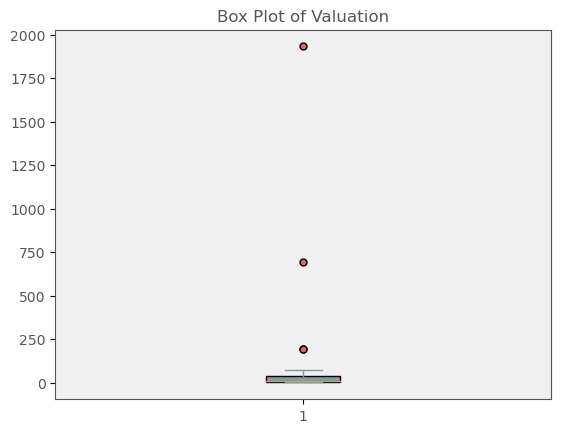

In [266]:
#
# Define custom colors
boxplot_color = '#7c9d9d'  # color for the box and whiskers
median_color = '#ff8080'   # color for the median line
outlier_color = '#e56262'  # color for the outlier points

# Create a box plot with custom colors
plt.boxplot(df_unicorn_sum['Valuation_num'], 
            patch_artist=True,
            boxprops=dict(facecolor=boxplot_color),
            medianprops=dict(color=median_color),
            capprops=dict(color=boxplot_color),
            whiskerprops=dict(color=boxplot_color),
            flierprops=dict(marker='o', markerfacecolor=outlier_color, markersize=5),
            )

# Set the color of the plot background
plt.gca().set_facecolor('#f0f0f0')

# Set the color of the axes
plt.gca().spines['bottom'].set_color('#555555')
plt.gca().spines['top'].set_color('#555555')
plt.gca().spines['left'].set_color('#555555')
plt.gca().spines['right'].set_color('#555555')

# Set the color of the tick labels
plt.xticks(color='#555555')
plt.yticks(color='#555555')

# Set the color of the plot title
plt.title('Box Plot of Valuation', color='#555555')

# Show the plot
plt.show()


**Let's assume the top 4 countries in the evaluation_num are not the one we are interested in, consider them as an outlier in the dataset. In order to visualize the rest of the data properly, let's remove the outliers.**

In [267]:
#Remove outlier countries.


df_unicorn_sum_outliers_removed=df_unicorn_sum[~df_unicorn_sum['Country/Region'].isin(['China', 'United States','India','United Kingdom'])]


Now, the data is ready to reveal the top 20 countries with highest company valuations. A data visualization, `sns.barplot` can be used to visualize the top 20 countries. 

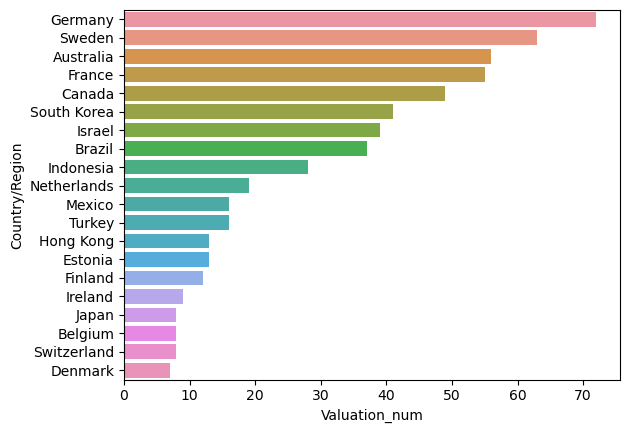

In [268]:
# Create a barplot to compare the top 20 countries with highest company valuations.


sns.barplot(data=df_unicorn_sum_outliers_removed.head(20),
            y='Country/Region',
            x='Valuation_num')

# Show the plot.


plt.show()

**Let's look into:** 
 - A global valuation map of all countries with companies that joined the `Unicorn` list after 2020
 - A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` and a separate map for Europe 



In [269]:
# Plot the sum of valuations per country.
''' 
Countries of unicorn companies that joined the list after 2020, 
excluding the countries named as an outlier
'''
df_unicorn =df_unicorn.reset_index(drop=True)
px.scatter_geo(df_unicorn_sum[
    df_unicorn["Year_Joined"]>2020
    ], locations='Country/Region', size='Valuation_num', locationmode='country names', color='Country/Region')


C:\Users\Admin\AppData\Local\Temp\ipykernel_11696\3071350325.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [270]:
# Plot the sum of valuations per country.



fig = px.scatter_geo(df_unicorn_sum_outliers_removed, 
                     locations='Country/Region', 
                     size='Valuation_num', 
                     locationmode='country names', 
                     color='Country/Region', 
                     title='Global Unicorn Company Values')

# Show the plot.


fig.show()

**Question: How is the valuation sum per country visualized in the plot?**
- Valuation sum per country is can be visualized by the size of circles around the map. Hover around the circles to see the exact number as the map is interactive. 

**Next, to create the same map for `europe` only, lets update the `fig` object to add a new title and also limit the scope of the map to `europe`**

In [271]:
# Update the figure layout.


fig.update_layout(
    title_text = 'Europe Unicorn Company Values', # Create a Title
    geo_scope='europe',  # Plot only the Europe instead of globe
)

# Show the plot again.
fig.show()

In [272]:
# Update the figure layout.


fig.update_layout(
    title_text = 'Asia Unicorn Company Values', # Create a Title
    geo_scope='asia',  # Plot only the Europe instead of globe
)

# Show the plot again.
fig.show()

**Determine Countries with the highest `Funding`**

* In order to calculate this, first we need to convert the Funding column datatype into numeric. 

In [273]:
df_unicorn.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,Valuation_num
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [274]:
#Remove the $ & B/M values

df_unicorn['Funding']=df_unicorn['Funding'].str.strip('$BM')

In [275]:
df_unicorn.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year_Joined                  int64
Valuation_num                int64
dtype: object

In [276]:
df_unicorn = df_unicorn.replace("Unknown", np.nan)

In [277]:
df_unicorn = df_unicorn.dropna()

df_unicorn.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Year_Joined         0
Valuation_num       0
dtype: int64

In [278]:
#Covert the Funding column into numeric 
df_unicorn['Funding']=pd.to_numeric(df_unicorn['Funding'])

In [279]:
df_unicorn.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                      int64
Select Investors            object
Year_Joined                  int64
Valuation_num                int64
dtype: object

In [280]:
#timespan between being a unicorn and being founded
df_unicorn['Timespan'] = df_unicorn['Year_Joined']-df_unicorn['Year Founded']

In [281]:
dataset = df_unicorn.sort_values('Valuation', ascending=False)

[Text(0.5, 0, 'Continent'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Average Timespan per Continent(Unicorn status)')]

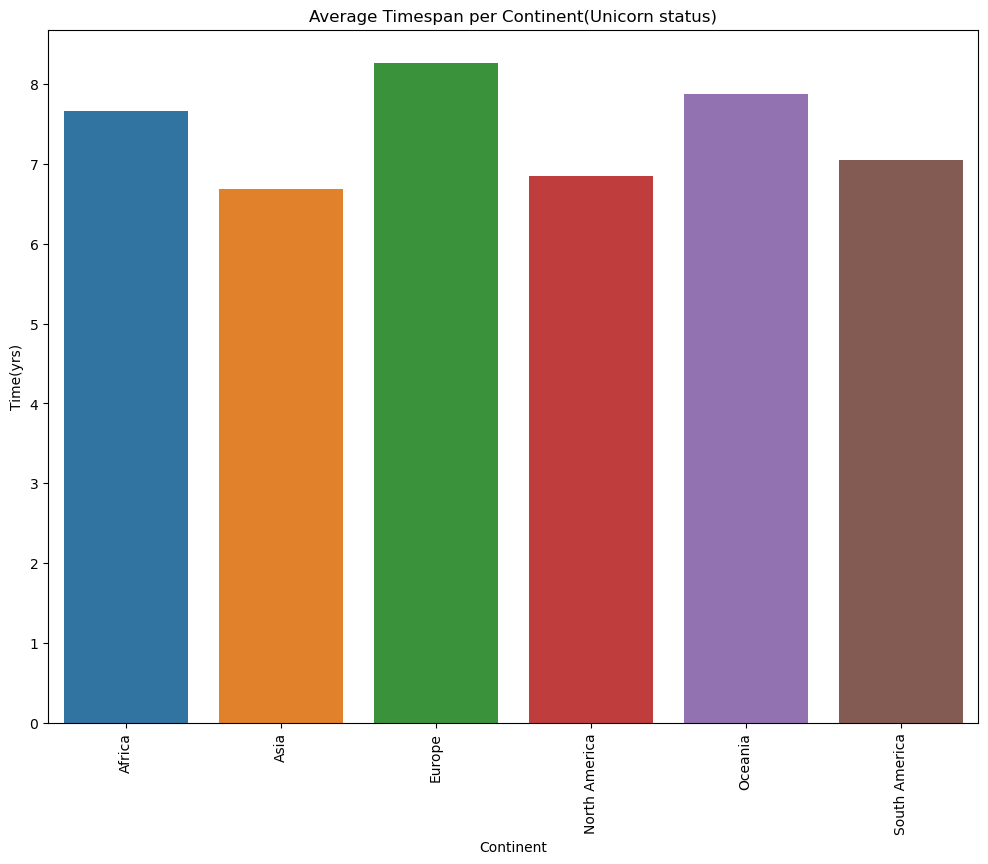

In [282]:
#Average timespan to achieve unicorn status per continent

df_ = dataset.groupby('Continent')['Timespan'].mean().reset_index()
length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))

g = sns.barplot(x = 'Continent', y= 'Timespan', data = df_)
g.set( xlabel = "Continent", ylabel = "Time(yrs)", title= 'Average Timespan per Continent(Unicorn status)')

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Average Timespan per Country(Unicorn status)')]

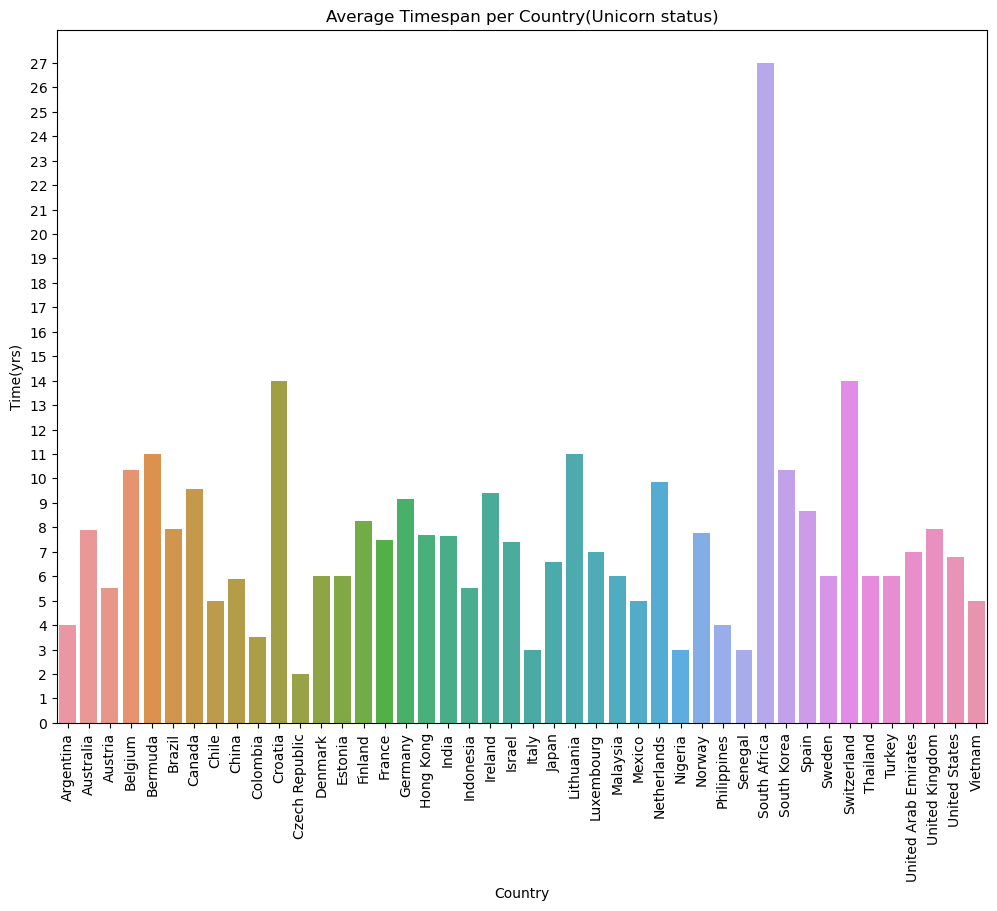

In [283]:
#Average timespan to achieve unicorn status per country

df_ = dataset.groupby('Country/Region')['Timespan'].mean().reset_index()
length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))
g = sns.barplot(x = 'Country/Region', y= 'Timespan', data = df_)
g.set( xlabel = "Country", ylabel = "Time(yrs)", title= 'Average Timespan per Country(Unicorn status)')

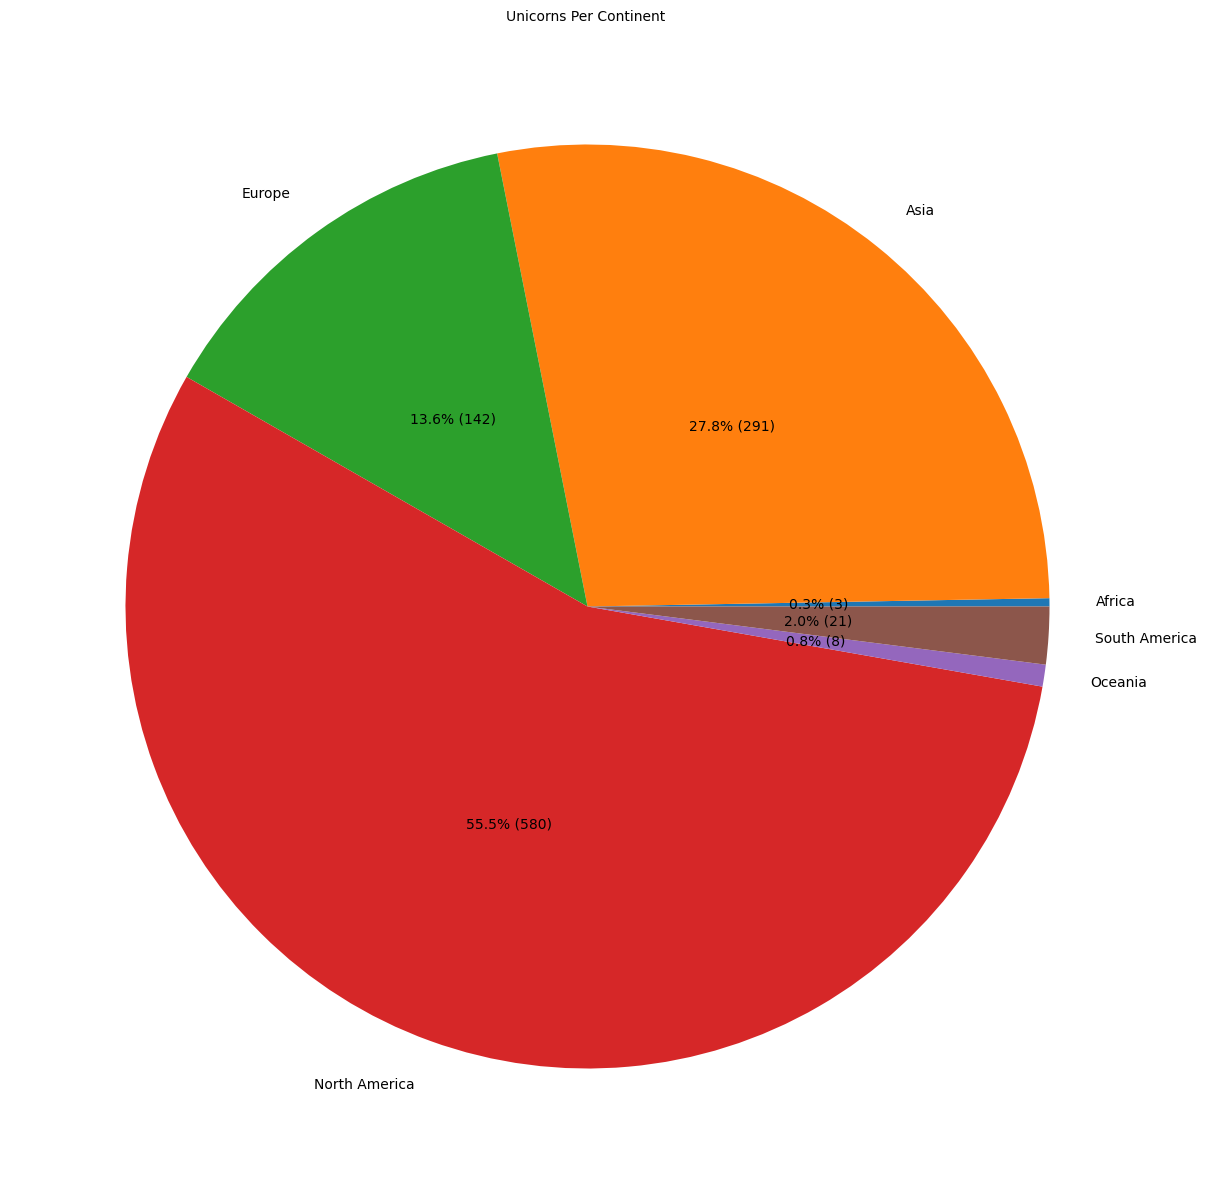

In [284]:
#Unicorn companies per continent
df_ = dataset.groupby('Continent')['Company'].count().reset_index()
Continent_array = df_['Continent'].to_numpy()
pie, ax = plt.subplots(figsize=[15,15])
labels = Continent_array
plt.pie(x=df_['Company'], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,p*df_['Company'].sum()/100.0), labels=labels, pctdistance=0.5)
plt.title("Unicorns Per Continent ", fontsize=10);

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Company Count'),
 Text(0.5, 1.0, 'Unicorns Per Industry')]

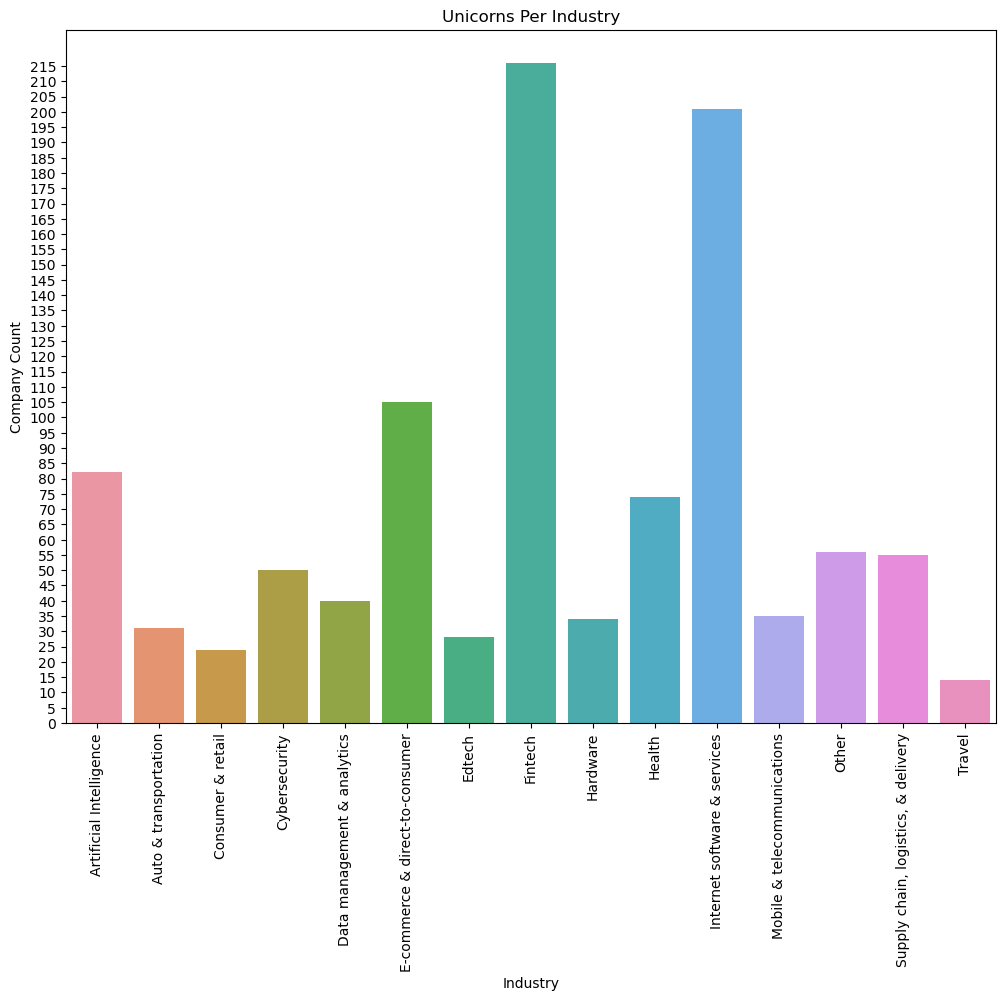

In [285]:
#unicorns per industry
df_ = dataset.groupby('Industry')['Company'].count().reset_index()
length = max(df_['Company'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'Industry', y= 'Company', data = df_)
g.set( xlabel = "Industry", ylabel = "Company Count", title= 'Unicorns Per Industry')

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Valuation (billion $)'),
 Text(0.5, 1.0, 'Unicorns Valuation Per Industry')]

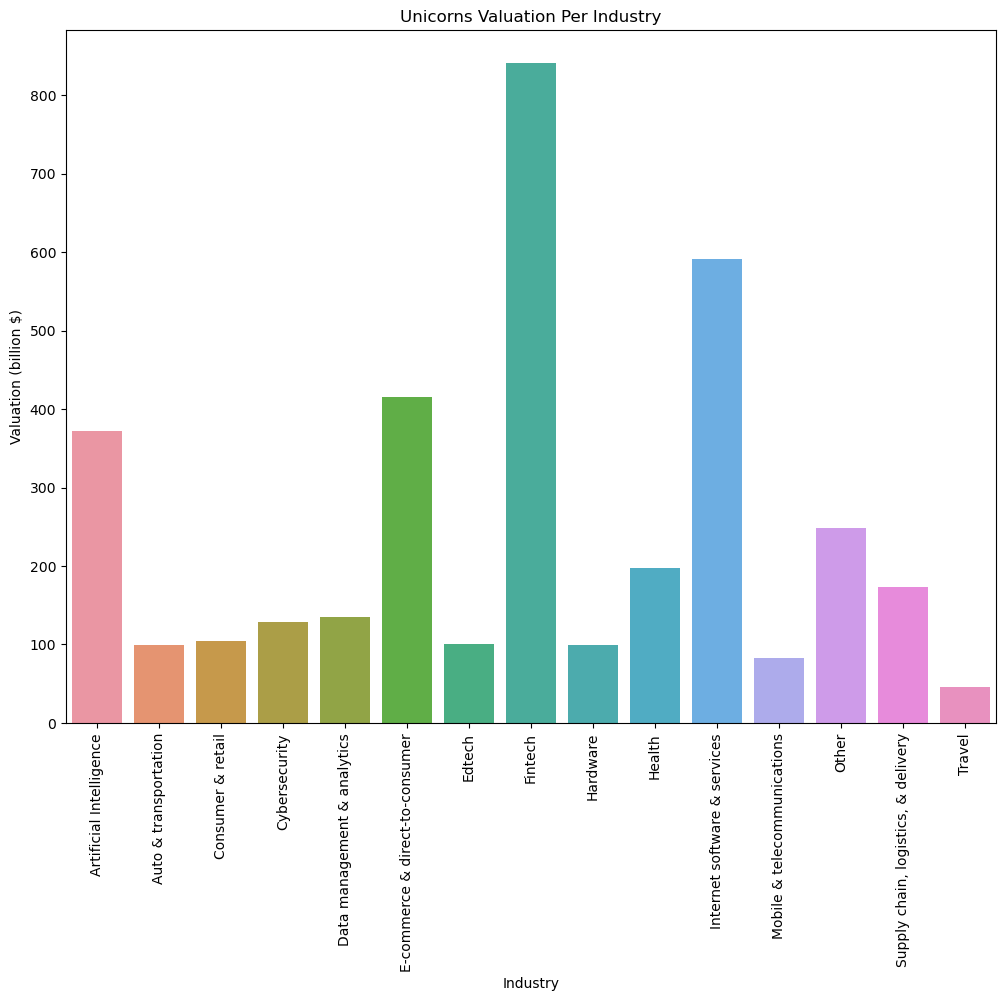

In [286]:
#Unicorns Valuation by industry
df_ = dataset.groupby('Industry')['Valuation_num'].sum().reset_index()
length = max(df_['Valuation_num'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 100))
g = sns.barplot(x = 'Industry', y= 'Valuation_num', data = df_)
g.set( xlabel = "Industry", ylabel = "Valuation (billion $)", title= 'Unicorns Valuation Per Industry')

In [287]:
df_unicorn.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors', 'Year_Joined', 'Valuation_num', 'Timespan'],
      dtype='object')

In [288]:
df_fund_country = df_unicorn.groupby("Continent")['Funding'].sum().reset_index()

In [289]:
df_fund_country.head()

,Continent,Funding
0,Africa,1317
1,Asia,93154
2,Europe,51572
3,North America,195181
4,Oceania,2708


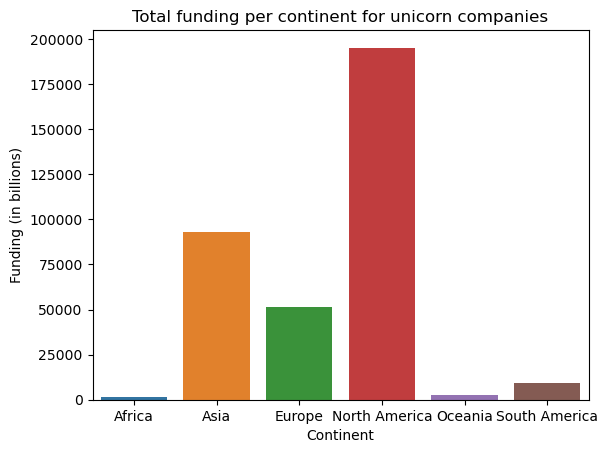

In [290]:
# Total funding per continent
df_fund_country = df_unicorn.groupby("Continent")['Funding'].sum().reset_index()

# Define the colors for each continent
colors = {'Africa': 'tab:blue', 'Asia': 'tab:orange', 'Europe': 'tab:green',
          'North America': 'tab:red', 'Oceania': 'tab:purple', 'South America': 'tab:brown'}

# Create the barplot
sns.barplot(x='Continent', y='Funding', data=df_fund_country, palette=colors)

# Add labels to the plot
plt.xlabel('Continent')
plt.ylabel('Funding (in billions)')
plt.title('Total funding per continent for unicorn companies')
plt.show()


In [291]:
df_unicorn.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors', 'Year_Joined', 'Valuation_num', 'Timespan'],
      dtype='object')

In [292]:
#Top 10 Investors into the unicorn companies by country. 

df_inv = df_unicorn.groupby('Select Investors')["Country/Region"].sum().value_counts()

df_inv.head(10)

United States     541
China             165
India              62
United Kingdom     42
Germany            25
France             23
Israel             19
Canada             18
Brazil             16
South Korea        11
Name: Country/Region, dtype: int64

In [306]:
# Grouping by 'Country/Region', 'Select Investors', and 'Industry' columns, and getting value counts
df_grouped = df_unicorn.groupby(['Country/Region', 'Select Investors', 'Industry']).size().reset_index(name='Count')

# Summing up the value counts by country
df_summed = df_grouped.groupby('Country/Region')['Count'].sum().reset_index(name='Total Count')

# Displaying the resulting DataFrame
df_summed.head()


,Country/Region,Total Count
0,Argentina,1
1,Australia,8
2,Austria,2
3,Belgium,3
4,Bermuda,1


In [307]:

# Grouping by 'Country/Region', 'Select Investors', and 'Industry' columns, and getting value counts
df_grouped = df_unicorn.groupby(['Country/Region', 'Select Investors', 'Industry']).size().reset_index(name='Count')

# Summing up the value counts by country
df_summed = df_grouped.groupby('Country/Region')['Count'].sum().reset_index(name='Total Count')

# Sorting the DataFrame by 'Total Count' in descending order
df_top_10 = df_summed.sort_values('Total Count', ascending=False).head(10)

# Displaying the top 10 countries by count
df_top_10.style.background_gradient()


,Country/Region,Total Count
42,United States,555
8,China,169
18,India,65
41,United Kingdom,43
16,Germany,26
15,France,23
21,Israel,20
6,Canada,18
5,Brazil,16
34,South Korea,12


**Plot the above result and anotate the value counts for each Country**

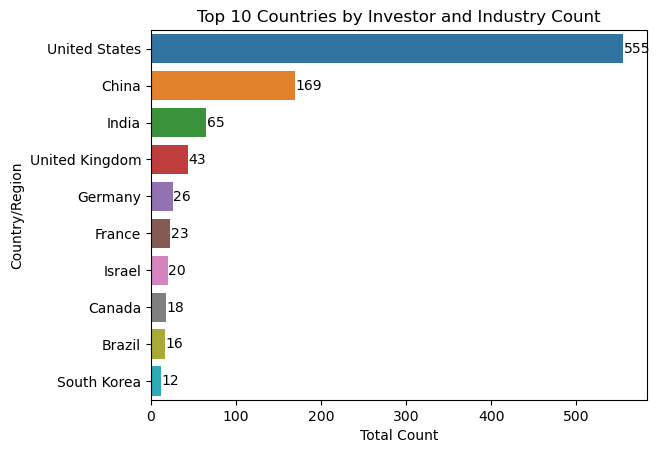

In [310]:

# Plotting the data using seaborn
ax = sns.barplot(x='Total Count', y='Country/Region', data=df_top_10)

# Adding annotations to the bars
for p in ax.patches:
    count = p.get_width()
    x = p.get_x() + count + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(int(count), (x, y), ha='left', va='center')

# Adding labels and title to the plot
plt.xlabel('Total Count')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries by Investor and Industry Count')

# Displaying the plot
plt.show()



## Conclusion

All the relevant findings are provided above. Summary of the overall analysis to be completed by: TBD